# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [155]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_excel('alldata.xlsx')

df = df.dropna()

party = df['parti']
drop_cols = ['navn', 'storkreds', 'parti']
df = df.drop(drop_cols, axis=1)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [156]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(df_scaled)
print(f'Explained variance: {pca_2.explained_variance_ratio_.sum()}')

Explained variance: 0.5098757969465345


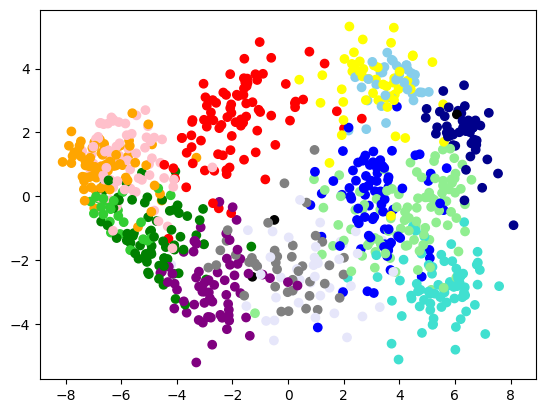

In [157]:
party_colors = {
    "Socialdemokratiet": "red",
    "Radikale Venstre": "purple",
    "Det Konservative Folkeparti": "lightgreen",
    "Nye Borgerlige": "darkblue",
    "Socialistisk Folkeparti": "pink",
    "Liberal Alliance": "turquoise",
    "Kristendemokraterne": "grey",
    "Moderaterne": "lavender",
    "Dansk Folkeparti": "yellow",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "limegreen",
    "Enhedslisten": "orange",
    "Venstre": "blue",
    "Danmarksdemokraterne": "skyblue",
    "Alternativet": "green",
    "Løsgænger": "black"
}

plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=[party_colors[p] for p in party])
pca_comps = abs( pca_2.components_ )
first_component = pca_comps[0]
second_component = pca_comps[0]



In [158]:
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

importance_df  = create_importance_dataframe(pca_2, df)

pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:5]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:5]
print(), print(f'PC2 top 10 feautres are \n')
display(pc2_top_10_features )


PC1 top 10 feautres are 



530    0.190643
537    0.190213
4a     0.188772
3b     0.188750
550    0.188521
Name: PC1, dtype: float64


PC2 top 10 feautres are 



10b    0.302771
556    0.297671
551    0.293191
553    0.273748
4b     0.257564
Name: PC2, dtype: float64

##### Component 1
- 530 -> Denmark must spend more money on strengthening train and bus operations rather than building new motorways
- 537 -> It is okay for economic inequality to increase as long as the Danes generally become richer
- 4a -> Economic inequality in Danish society should be reduced.
- 3b -> Developing country aid should be increased.
- 550 -> Quotas must be introduced to ensure at least 30 percent women on company boards

##### Component 2
- 10b -> The so-called Arne pension, which allows for an earlier pension, must be maintained, even if there is a shortage of labour.
- 556 -> The so-called Arne pension must be abolished
- 551 -> There must be permanent border control between Denmark and Germany
- 553 -> More education places must be moved from the big cities
- 4b -> The state should compensate the Danes to a greater extent for the rising prices that inflation has brought about.

/var/folders/pg/92by_6gx0w97m7z_fq9n5_p80000gn/T/ipykernel_80992/258299002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_df['party'] = party


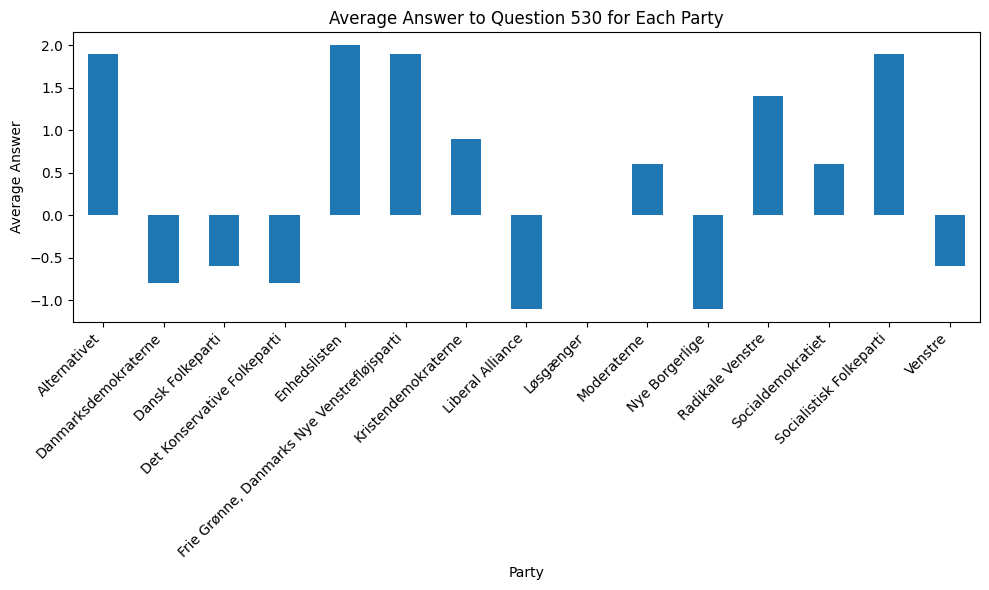

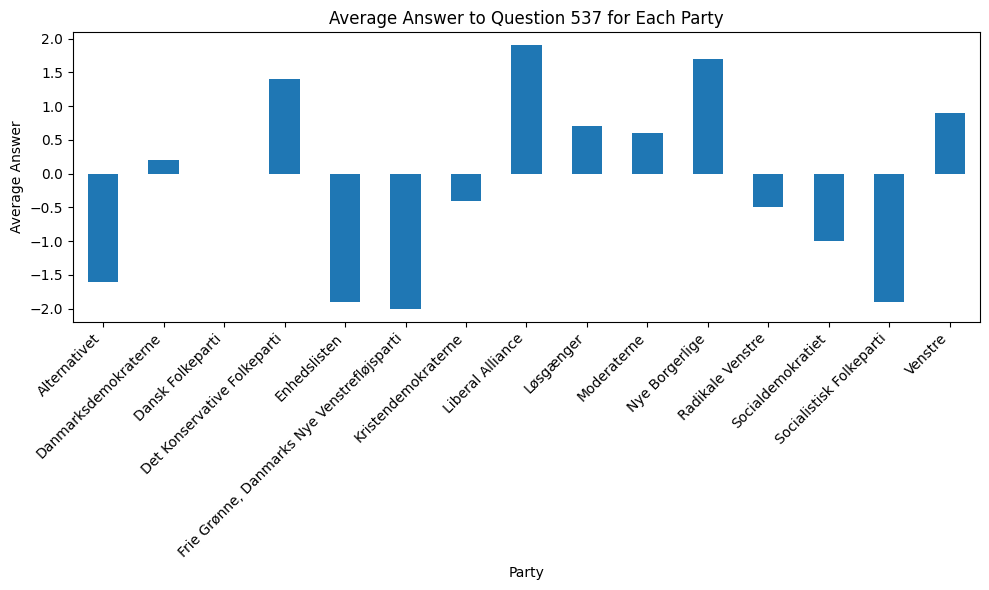

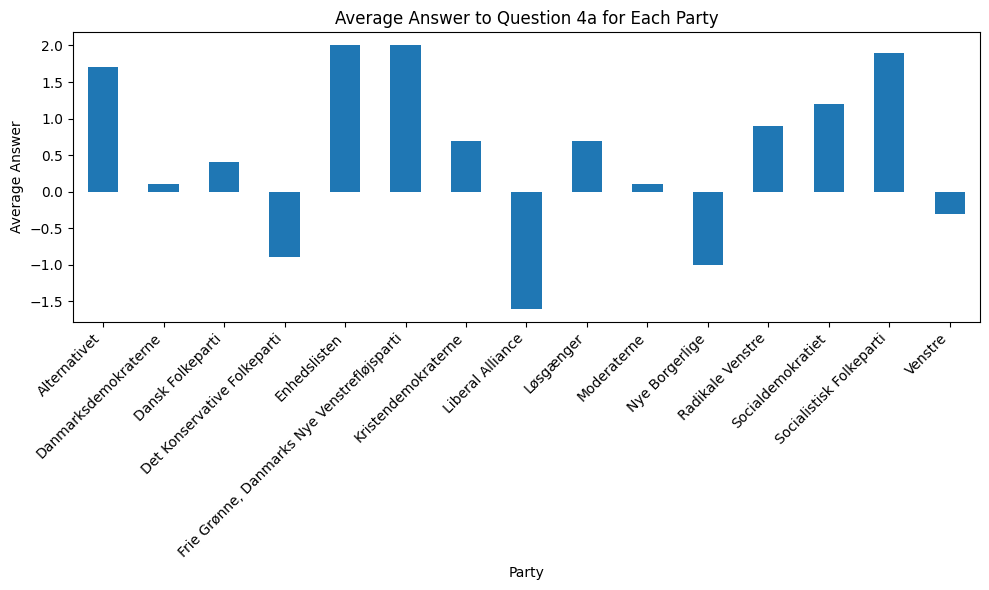

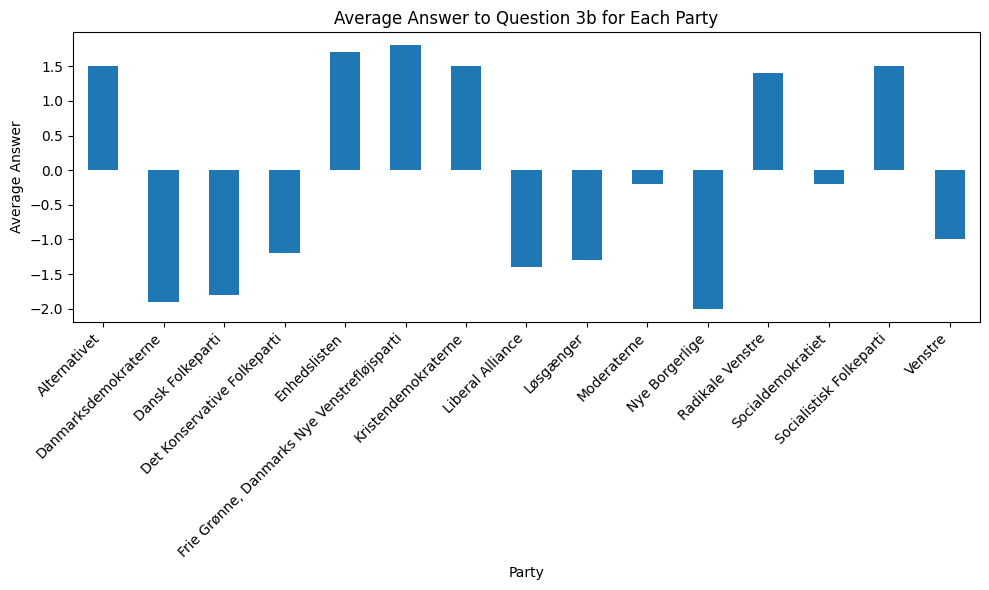

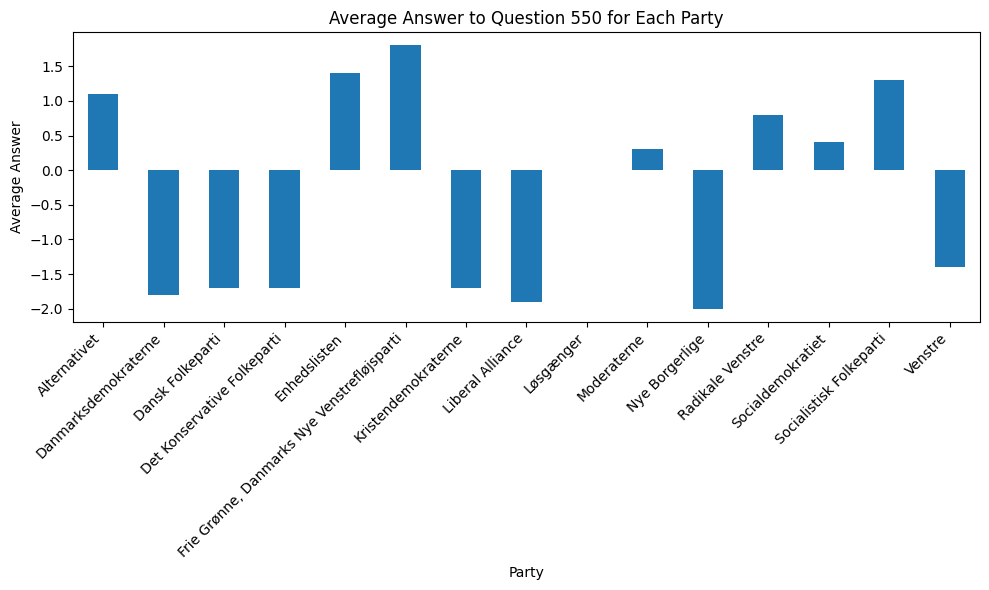

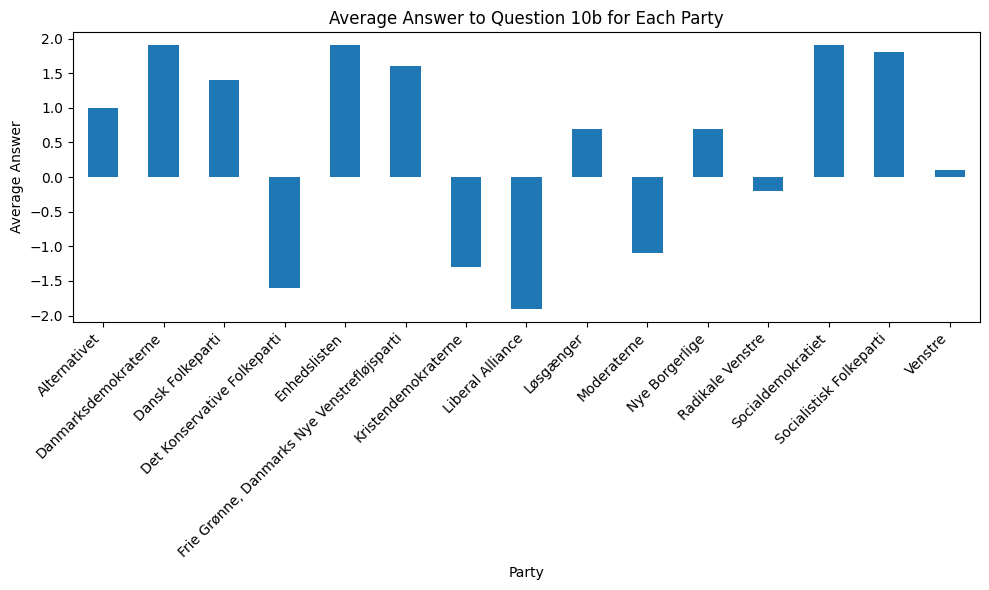

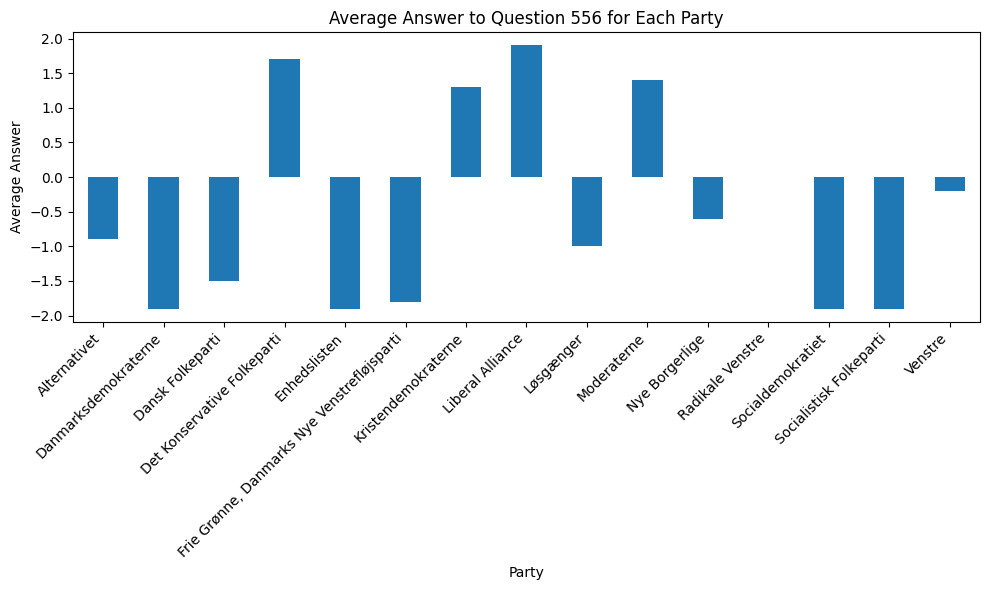

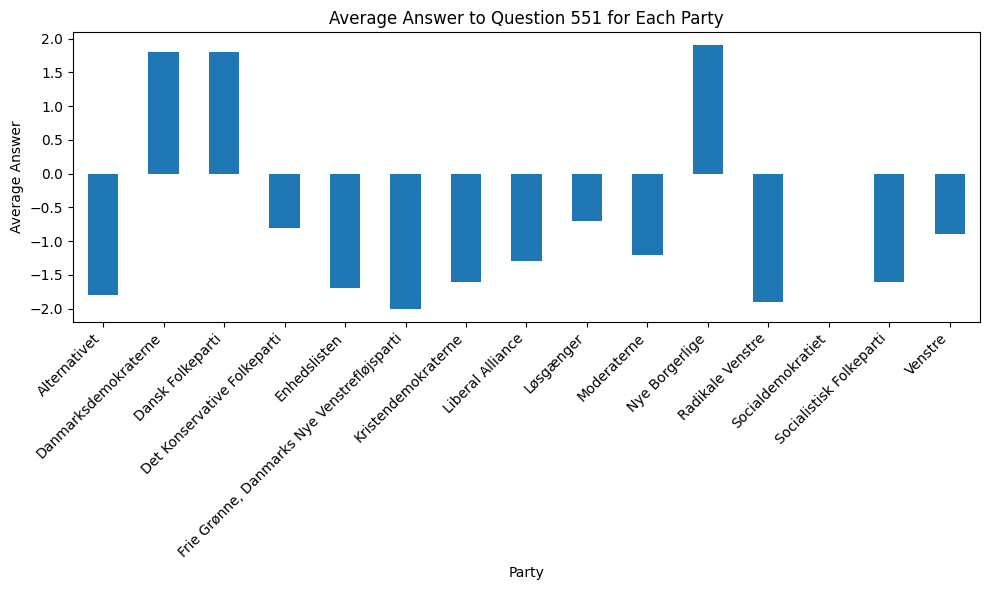

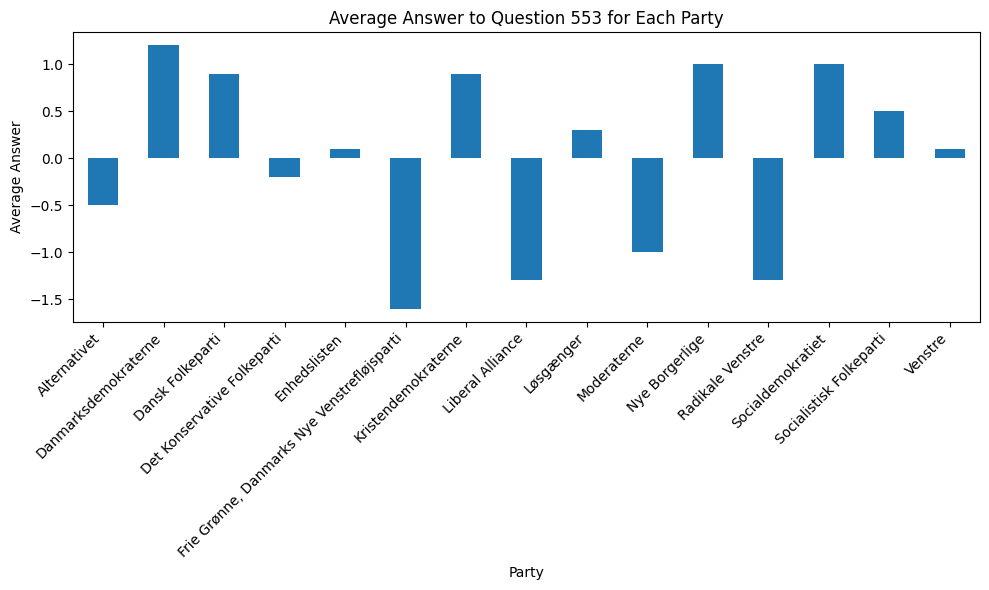

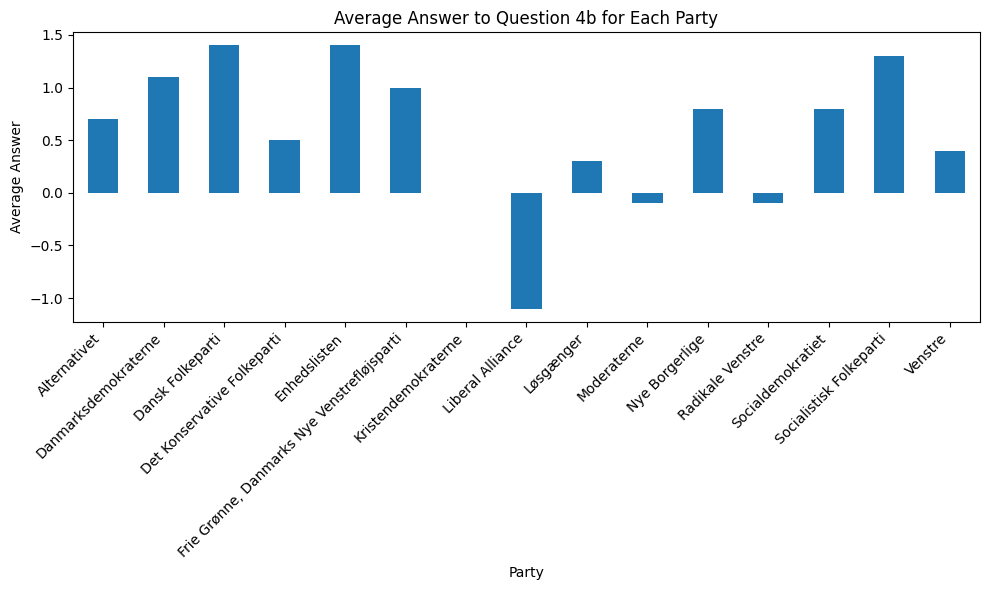

In [160]:
important_questions = ['530','537','4a','3b','550','10b','556','551','553','4b']
important_df = df[important_questions]
important_df['party'] = party
grouped_by = important_df.groupby('party')
grouped_by['530'].mean().round(1)


# Group by 'parti' column
grouped_by = important_df.groupby('party').mean().round(1)


# Plotting separate plots for each question
for question in important_questions:
    fig, ax = plt.subplots(figsize=(10, 6))
    grouped_by[question].plot(kind='bar', ax=ax)
    ax.set_ylabel('Average Answer')
    ax.set_xlabel('Party')
    ax.set_title(f'Average Answer to Question {question} for Each Party')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()




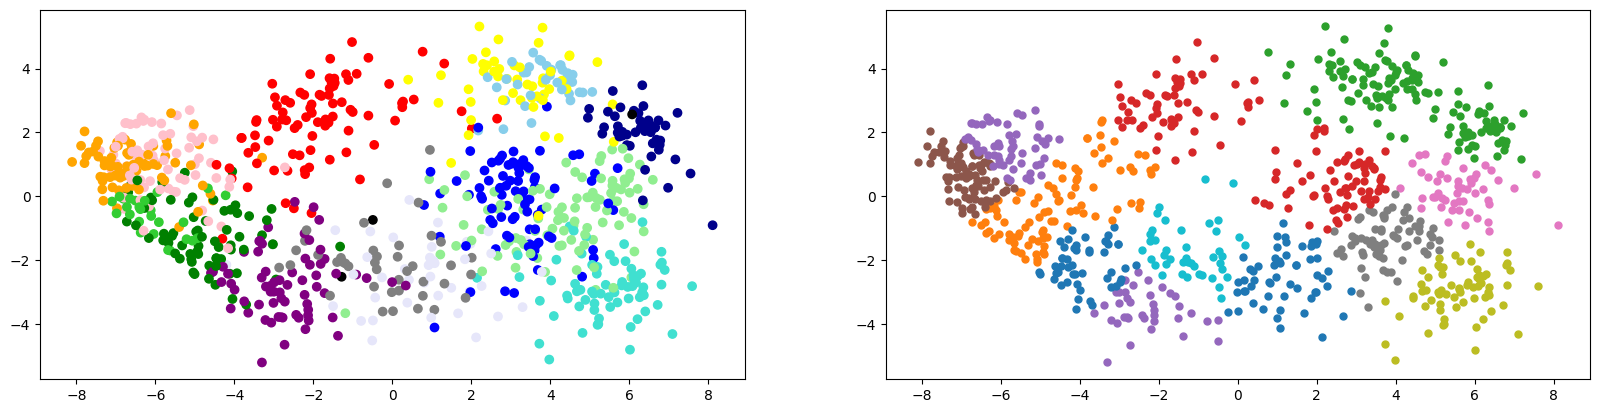

In [183]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(20)
ax[0].scatter(X_pca_2[:,0], X_pca_2[:,1], c=[party_colors[p] for p in party])
pca_comps = abs( pca_2.components_ )
first_component = pca_comps[0]
second_component = pca_comps[0]

# We don't need to find a value of k since we already know that there are 15 parties

kmeans = KMeans(n_clusters=15)
label = kmeans.fit_predict(X_pca_2)

for i in range(15):
    ax[1].plot(X_pca_2[label == i , 0] , X_pca_2[label == i , 1], '.', markersize=10, label = i)
   
    



K-means does a fine job.

Let's try without assuming that there are 15 parties

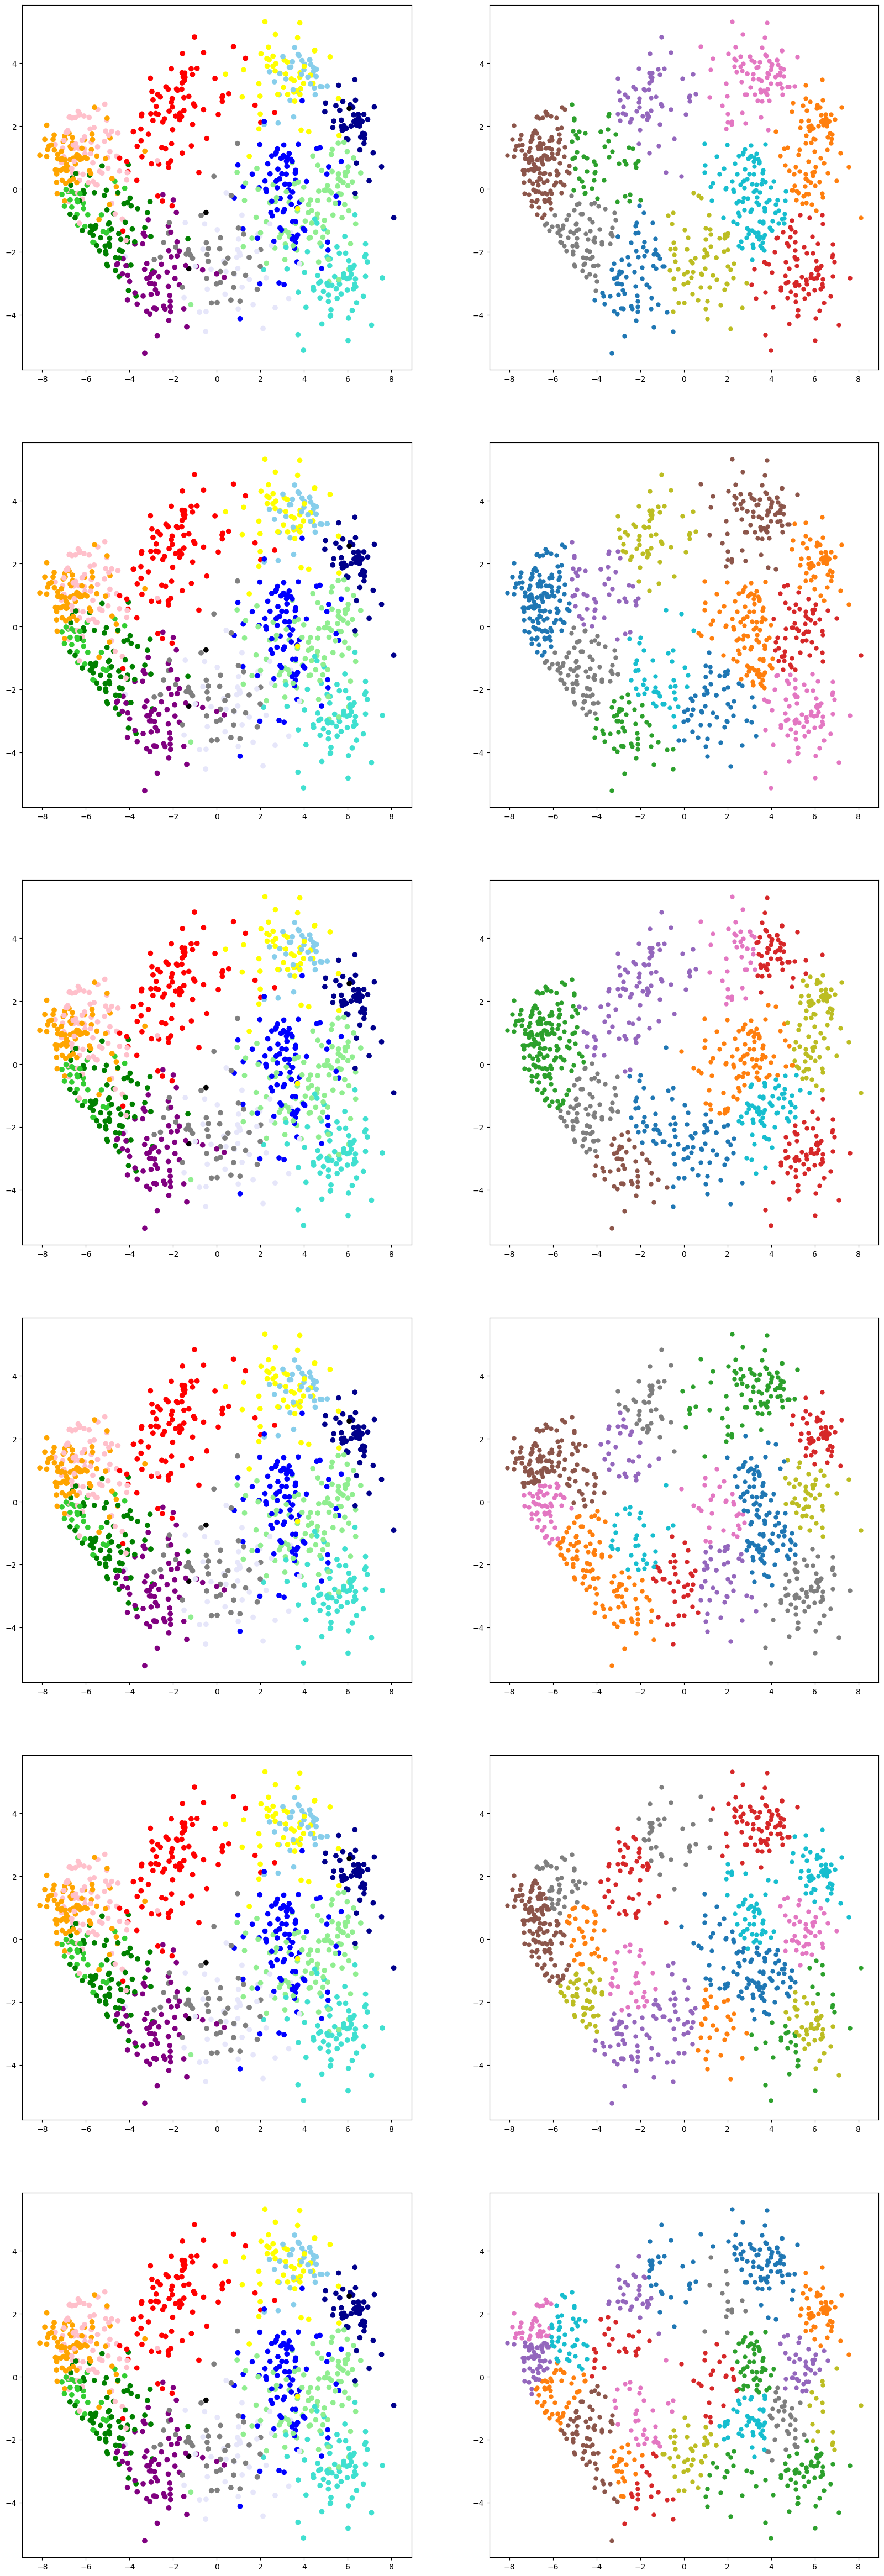

In [194]:
fig, ax = plt.subplots(6, 2)
fig.set_figwidth(20)
fig.set_figheight(60)

ks = [10, 12, 15, 18, 20, 25]

for i, k in enumerate(ks):
    ax[i][0].scatter(X_pca_2[:,0], X_pca_2[:,1], c=[party_colors[p] for p in party])
    pca_comps = abs( pca_2.components_ )
    first_component = pca_comps[0]
    second_component = pca_comps[0]

    # We don't need to find a value of k since we already know that there are 15 parties

    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(X_pca_2)

    for j in range(k):
        ax[i][1].plot(X_pca_2[label == j , 0] , X_pca_2[label == j , 1], '.', markersize=10, label = j)

In my opinion k=10 split the data in the most meaningful way, suggesting that perhaps there's too many parties and there are some of them that have too much in common.

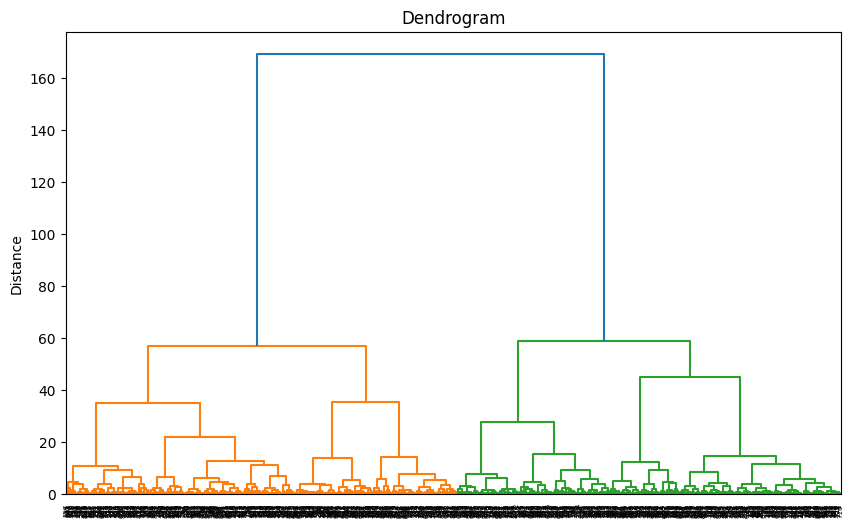

In [206]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X_pca_2)

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_array)
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

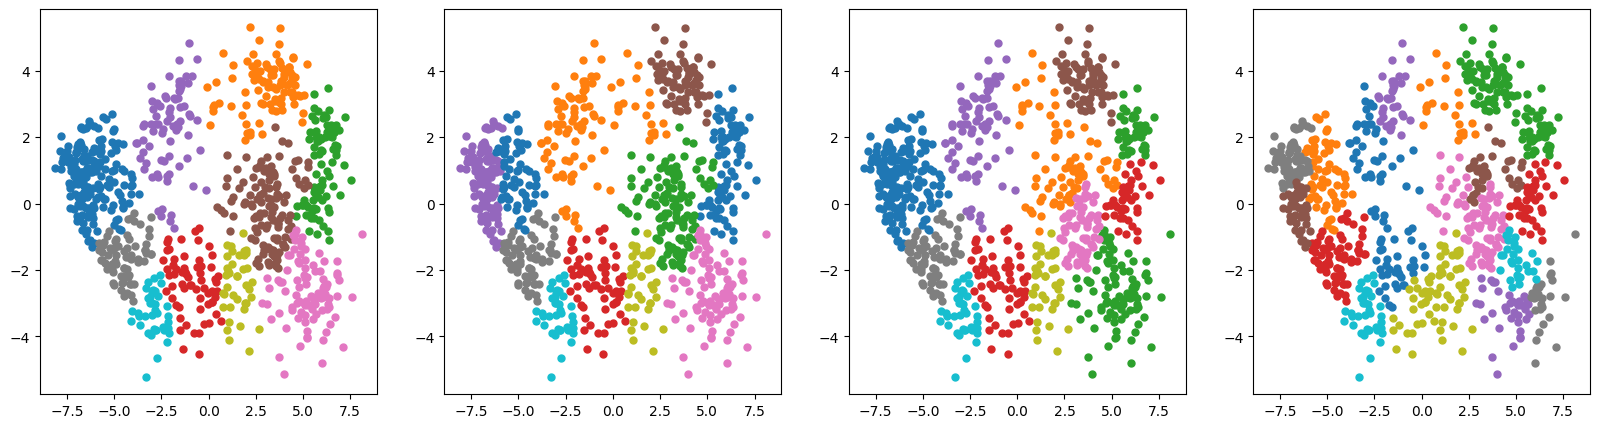

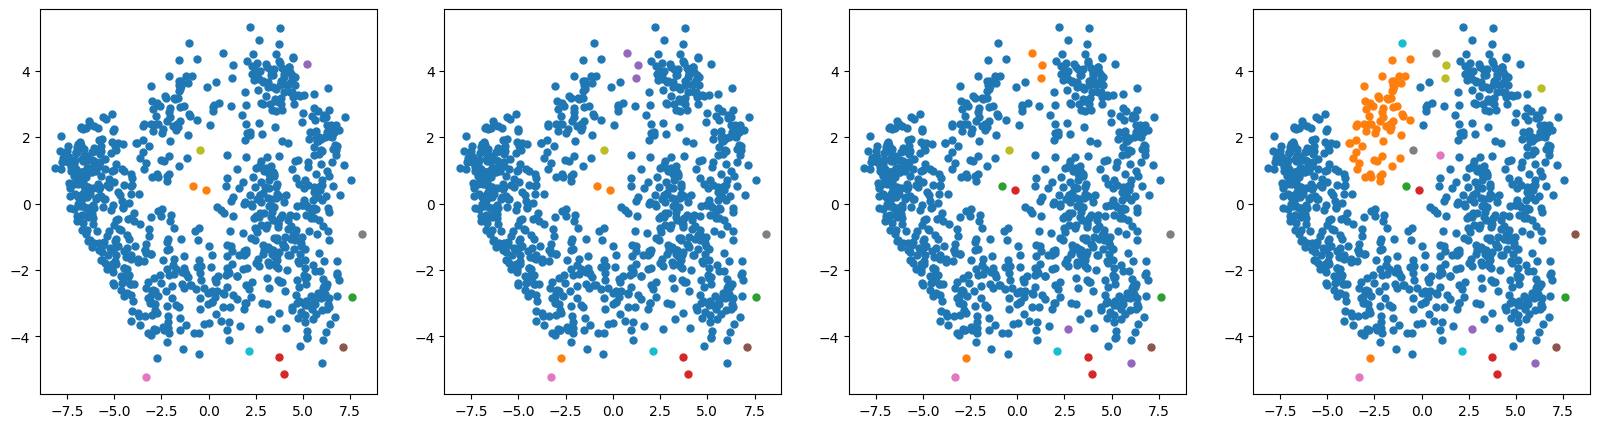

In [209]:
def plot_agg_clustering(ks, method):
    fig, axes = plt.subplots(1,4, figsize = (20,5))
    for i, ax in enumerate(zip(axes.ravel())):
        agg = AgglomerativeClustering(n_clusters=ks[i], linkage = method)
        label = agg.fit_predict(X_pca_2)
        for i in range(k):
            ax[0].plot(X_pca_2[label == i , 0] , X_pca_2[label == i , 1], '.', markersize=10, label = i)
    plt.show()

plot_agg_clustering([10, 12, 15, 20], 'ward')
plot_agg_clustering([10, 12, 15, 20], 'single') # does a terrible job cause data is has a lot of outliers 

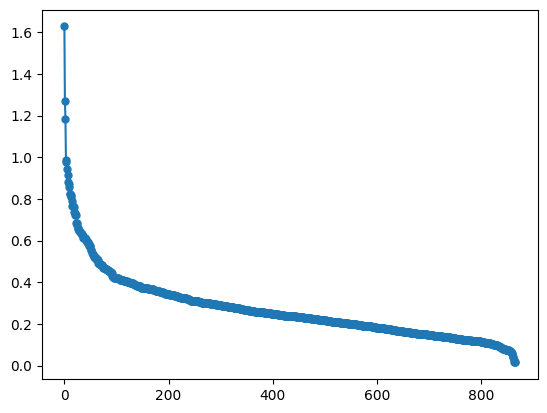

In [217]:
def calculate_k_distance(X,k):
    k_distance = []
    for i in range(len(X)):
        dist = []
        for j in range(len(X)):
            dist.append(np.linalg.norm(X[i,:]-X[j,:]))
        dist.sort()
        k_distance.append(dist[k])
    k_distance.sort(reverse=True)
    return k_distance


k = 2
k_distances = calculate_k_distance(X_pca_2,k)
plt.plot(range(len(X_pca_2)),k_distances,'.-', markersize=10)
plt.show()

let's take 1

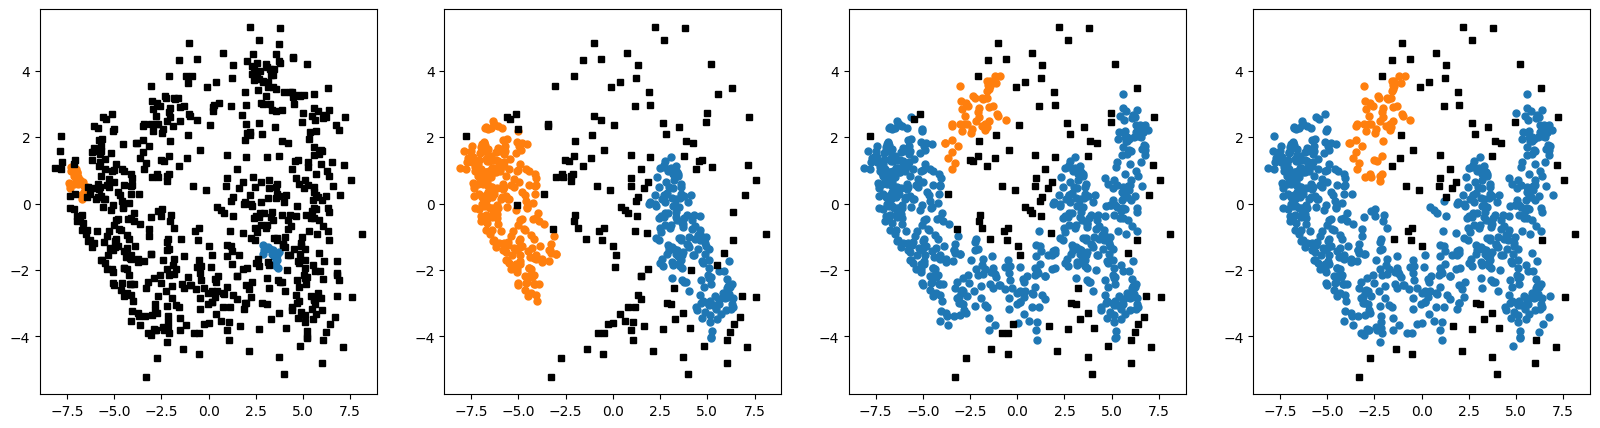

In [229]:
def plot_dbscan(eps):
    fig, axes = plt.subplots(1,4, figsize = (20,5))
    for i, ax in enumerate(zip(axes.ravel())):
        dbscan = DBSCAN(eps=eps[i], min_samples = 4)
        label = dbscan.fit_predict(X_pca_2)
        for i in range(k):
            ax[0].plot(X_pca_2[label == i , 0] , X_pca_2[label == i , 1], '.', markersize=10, label = i)
        ax[0].plot(X_pca_2[label == -1 , 0] , X_pca_2[label == -1 , 1], 'sk', markersize=4, label = -1) #plot outliers as black squares
    plt.show()
    
plot_dbscan([0.2, 0.4, 0.45, 0.5])